Matheus do Ó Santos Tiburcio

#Redução de dimensões com RGB

https://stackoverflow.com/questions/41500637/how-to-extract-r-g-b-values-with-numpy-into-seperate-arrays

https://stackoverflow.com/questions/21519203/plotting-a-list-of-x-y-coordinates-in-matplotlib

https://stackoverflow.com/questions/53493173/extracting-a-coordinate-from-a-python-list-of-tuples

https://www.mathworks.com/matlabcentral/answers/91036-how-do-i-split-a-color-image-into-its-3-rgb-channels#comment_467946

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

https://numpy.org/doc/stable/reference/generated/numpy.dstack.html#numpy.dstack

Não há todos os links, desculpe

##Bibliotecas que usei e funções que criei

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [ ]:
#Quebra uma imagem em 3 matrizes R, G e B
def ImgPraRGB(I):
  R = I[:, :, 0]
  G = I[:, :, 1]
  B = I[:, :, 2]
  return R, G, B

#junta R, G e B em uma matriz 3D
def RGBPraImg(R, G, B):

  Img = np.ndarray(shape=(R.shape[0], R.shape[1], 3), dtype=np.uint8)

  Img[:, :, 0] = R
  Img[:, :, 1] = G
  Img[:, :, 2] = B
  return Img

#Acha U, S e V de uma matriz
def AchaUSV(A):
  return np.linalg.svd(A, full_matrices=True)

#retorna a matrix A com rank k pelo svd
def SVDK(U, S, V, k):
  return np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))

#faz uma animação com diferentes ranks de uma "matriz-imagem"
def Anima(i):
  global fotos
  global numeroFrames
  k = len(fotos)-1-(i*round(len(fotos)/numeroFrames))
  plt.imshow(fotos[k])
  fig.suptitle(f"k = {k}")

In [ ]:
#importa uma imagem e converte em matriz
#img = Image.open("poo.jfif")
#img = Image.open("svd.png")
img = Image.open("naruto.jfif")
I = np.array(img)
I.shape

(168, 300, 3)

In [ ]:
#Fragmenta a imagem em R, G e B
R, G, B = ImgPraRGB(I)
#Canal com 0s
Z = np.zeros((I.shape[0], I.shape[1]))

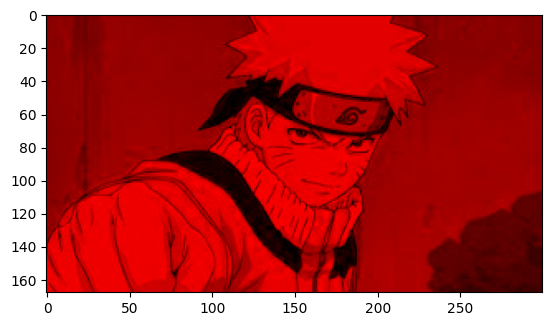

In [ ]:
plt.imshow(np.uint8(np.dstack((R, Z, Z))))

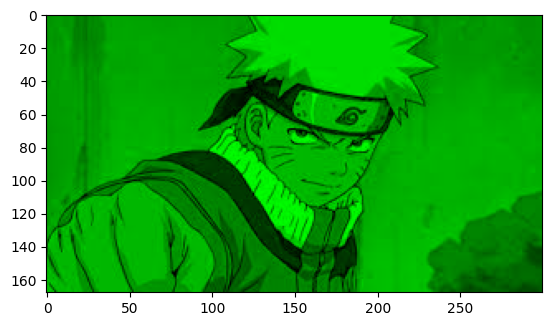

In [ ]:
plt.imshow(np.uint8(np.dstack((Z, G, Z))))

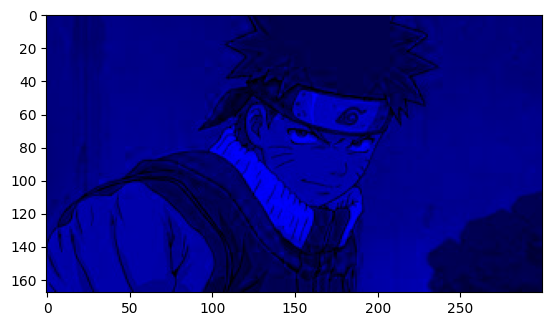

In [ ]:
plt.imshow(np.uint8(np.dstack((Z, Z, B))))

In [ ]:
rR = np.linalg.matrix_rank(R, tol=None, hermitian=False)
rG = np.linalg.matrix_rank(G, tol=None, hermitian=False)
rB = np.linalg.matrix_rank(B, tol=None, hermitian=False)
print(f"Rank de R: {rR}\nRank de G: {rG}\nRank de B: {rB}")

Rank de R: 168
Rank de G: 168
Rank de B: 168


##Teste e medição de erro

###Aqui são testadas as normas de todos os ranks (de rank 1 até o rank original da imagem), assim como também armazena as matrizes em uma lista

In [ ]:
#Processa as imagens de diferentes ranks e armazena algumas informações úteis
In = I.copy()
pontos = []
fotos = []
Rs = []
Gs = []
Bs = []

USVs = [AchaUSV(R), AchaUSV(G), AchaUSV(B)]
for i in range(1, rR+1):
  Rk = SVDK(USVs[0][0], USVs[0][1], USVs[0][2], i)
  Gk = SVDK(USVs[1][0], USVs[1][1], USVs[1][2], i)
  Bk = SVDK(USVs[2][0], USVs[2][1], USVs[2][2], i)
  In = RGBPraImg(Rk, Gk, Bk)
  fotos.append(In)
  norma = np.linalg.norm(I - In)
  pontos.append((i, norma))

  Rs.append(Rk)
  Gs.append(Gk)
  Bs.append(Bk)


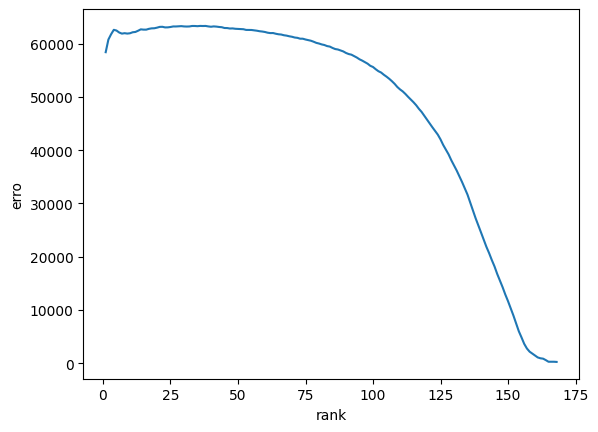

In [ ]:
#grafico de erro para cada rank
plt.xlabel("rank")
plt.ylabel("erro")
plt.plot(*zip(*pontos))

In [ ]:
fig = plt.figure()
numeroFrames = 18

animacao = FuncAnimation(fig, Anima, frames=numeroFrames, interval=250)

gif = animacao.to_html5_video()
html = display.HTML(gif)
display.display(html)

plt.close()

##Método para escolher um k definindo um valor aceitável de erro pela distancia entre a imagem e suas "versões" de dimensões menores.

Norma sendo definida aqui por: || I - In ||

I: Imagem original

In: Imagem com dimensão reduzida

rank(In) <= rank(I)

(144, 19372.95929898166)


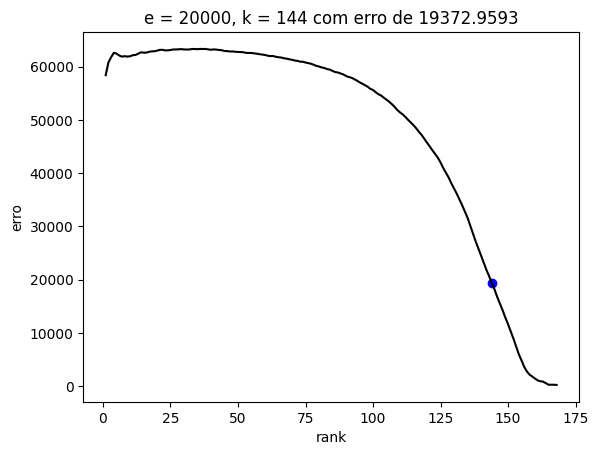

In [ ]:
erroAceitavel = 20000
pontoEscolhido = []
for i in pontos:
  if(i[1] <= erroAceitavel):
    print(i)
    pontoEscolhido = i
    break
if(pontoEscolhido != []):
  plt.xlabel("rank")
  plt.ylabel("erro")
  plt.plot(*zip(*pontos), color="black")
  plt.scatter(pontoEscolhido[0], pontoEscolhido[1], color="blue")
  plt.title(f"e = {erroAceitavel}, k = {pontoEscolhido[0]} com erro de {round(pontoEscolhido[1], 5)}")
else:
  print("Não encontrado k que satisfizesse a condição!")

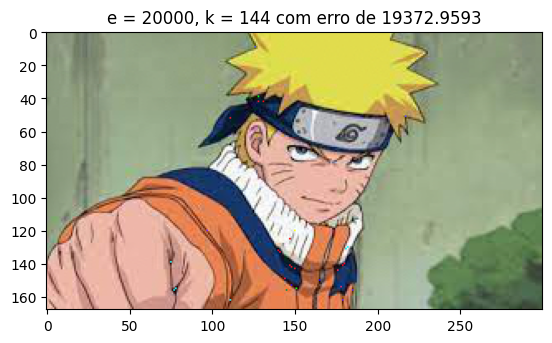

In [ ]:
if(pontoEscolhido != []):
  plt.imshow(fotos[pontoEscolhido[0]-1])
  plt.title(f"e = {erroAceitavel}, k = {pontoEscolhido[0]} com erro de {round(pontoEscolhido[1], 5)}")

##Métodos para escolher um k definindo um L

Compara L com ||I - In|| / ||I||

I: Imagem original

In: Imagem com dimensão reduzida

rank(In) <= rank(I)

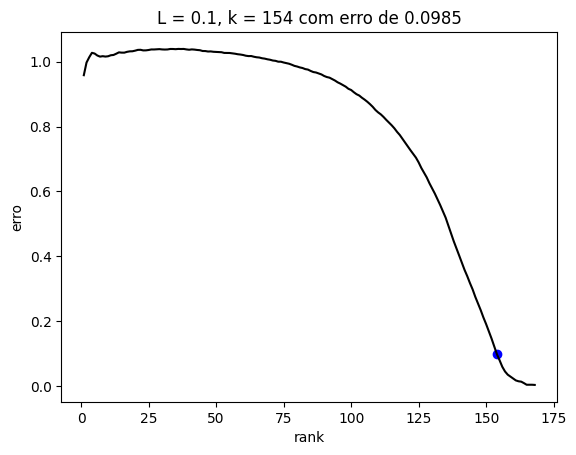

In [ ]:
L = 0.1
pontoEscolhido = []
normaI = np.linalg.norm(I)
pontos2 = []
for i in pontos:
  pontos2.append((i[0], i[1]/normaI))
for i in pontos2:
  if(i[1] <= L):
    pontoEscolhido = i
    break
if(pontoEscolhido != []):
  plt.xlabel("rank")
  plt.ylabel("erro")
  plt.plot(*zip(*pontos2), color="black")
  plt.scatter(pontoEscolhido[0], pontoEscolhido[1], color="blue")
  plt.title(f"L = {L}, k = {pontoEscolhido[0]} com erro de {round(pontoEscolhido[1], 5)}")
else:
  print("Não encontrado k que satisfizesse a condição!")

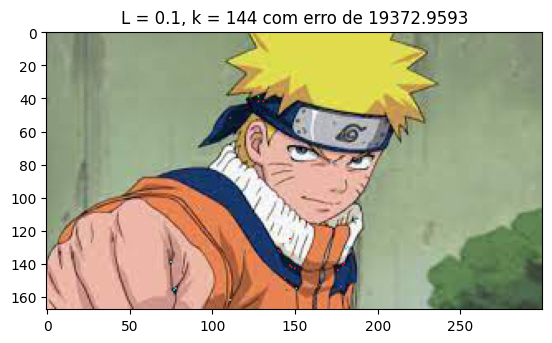

In [ ]:
if(pontoEscolhido != []):
  plt.imshow(fotos[pontoEscolhido[0]-1])
  plt.title(f"L = {L}, k = {pontoEscolhido[0]} com erro de {round(pontoEscolhido[1], 5)}")

##Selecionando um L, mas analisando R, G e B separadamente

In [ ]:
pontosRgb = []
#normas de R, G e B originais
nR = np.linalg.norm(R)
nG = np.linalg.norm(G)
nB = np.linalg.norm(B)

#define a norma ||MatrizOriginal - MatrizDeRanki|| / ||MatrizOriginal||
for i in range(0, rR):
  nRi = np.linalg.norm(R - Rs[i])/nR
  nGi = np.linalg.norm(G - Gs[i])/nG
  nBi = np.linalg.norm(B - Bs[i])/nB
  pontosRgb.append((i+1, nRi, nGi, nBi))

In [ ]:
pontosR = [(x1, x2) for x1, x2, x3, x4 in pontosRgb]
pontosG = [(x1, x3) for x1, x2, x3, x4 in pontosRgb]
pontosB = [(x1, x4) for x1, x2, x3, x4 in pontosRgb]

In [ ]:
L = 0.01
#Pega o primeiro rank para cada matriz que satisfaça norma <= L
ranksRGB = [-1, -1, -1]
for p in pontosRgb:
  if(ranksRGB[0] == -1 and p[1] <= L):
    ranksRGB[0] = p[0]
  if(ranksRGB[1] == -1 and p[2] <= L):
    ranksRGB[1] = p[0]
  if(ranksRGB[2] == -1 and p[3] <= L):
    ranksRGB[2] = p[0]
  if(ranksRGB[0] != -1 and ranksRGB[1] != -1 and ranksRGB[2] != -1):
    break

In [ ]:
ranksRGB #Respectivamente, k de R, de G e de B

[118, 121, 127]

Text(0.5, 1.0, 'L = 0.01, k(R, G, B) = (118, 121, 127)')

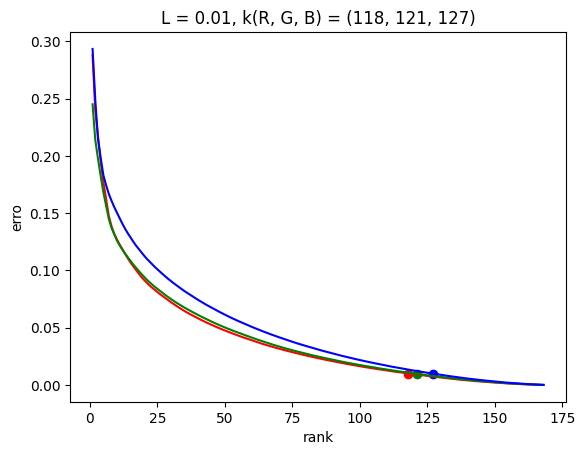

In [ ]:
plt.xlabel("rank")
plt.ylabel("erro")

plt.plot(*zip(*pontosR), color="red")
plt.plot(*zip(*pontosG), color="green")
plt.plot(*zip(*pontosB), color="blue")

plt.scatter(pontosR[ranksRGB[0]-1][0], pontosR[ranksRGB[0]-1][1], color="red")
plt.scatter(pontosG[ranksRGB[1]-1][0], pontosG[ranksRGB[1]-1][1], color="green")
plt.scatter(pontosB[ranksRGB[2]-1][0], pontosB[ranksRGB[2]-1][1], color="blue")
plt.title(f"L = {L}, k(R, G, B) = ({ranksRGB[0]}, {ranksRGB[1]}, {ranksRGB[2]})")

Text(0.5, 1.0, 'L = 0.1, k(R, G, B) = (118, 121, 127)')

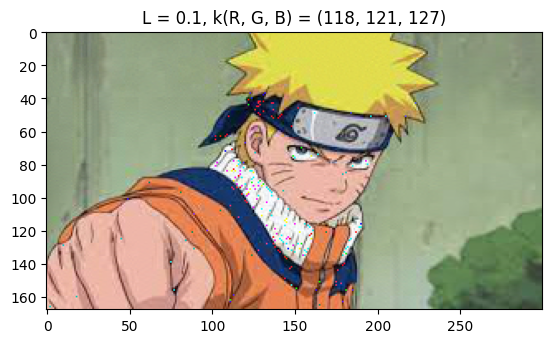

In [ ]:
#constroi a "matriz-imagem" e a plota
In2 = RGBPraImg(Rs[ranksRGB[0]-1], Gs[ranksRGB[1]-1], Bs[ranksRGB[2]-1])
plt.imshow(In2)
plt.title(f"L = {L}, k(R, G, B) = ({ranksRGB[0]}, {ranksRGB[1]}, {ranksRGB[2]})")